### 🧼 Step 1: Loading the Data

Here I’m importing the dataset into a Pandas DataFrame so I can start working with it.  
This CSV uses semicolons instead of commas, so I made sure to set that in the code.  
Just getting a first look at the rows to understand what kind of data I'm working with.


In [22]:
import pandas as pd

# Load the CSV with semicolon separator
df = pd.read_csv("2025_06_15_MousedB.csv", sep=';')

# Preview the first few rows
df.head()



,Brand,Name,Length (mm),Width (mm),Height (mm),Weight (g),Shape,Hump placement,Front flare,Side curvature,...,Connectivity,Sensor,Sensor technology,Sensor position,DPI,Polling rate,Tracking speed (IPS),Acceleration (G),Side buttons,Middle buttons
0,Pulsar ZywOo,The Chosen Mouse - Mini,115.6,63.4,40.7,55.0,Ergonomic,Center,Outward - moderate,Inward,...,Wireless,Pulsar XS-1,Optical,Centered (51%),32000,8000,750,50,2,0
1,Pulsar ZywOo,The Chosen Mouse - Medium,122.0,66.0,43.0,59.0,Ergonomic,Center,Outward - moderate,Inward,...,Wireless,Pulsar XS-1,Optical,Centered (51%),32000,8000,750,50,2,0
2,WLmouse,Sword X,123.0,67.0,42.0,47.0,Ergonomic,Center,Outward - moderate,Inward,...,Wireless,PixArt PAW3950 HS,Optical,Centered (52%),30000,8000,750,50,2,0
3,Darmoshark,M3 Micro Pro,105.5,54.6,33.5,42.0,Symmetrical,Back - moderate,Outward - slight,Inward,...,Wireless,PixArt PAW3950,Optical,Front - minimal (54%),30000,8000,750,50,2,0
4,ASUS,ROG Gladius II Wireless,126.0,67.0,45.0,90.0,Ergonomic,Center,Outward - aggressive,Inward,...,Wireless,PixArt PMW3389,Optical,Front - minimal (53%),16000,1000,400,50,2,1


### 📋 Step 2: Checking Column Types & Missing Data

Before doing any analysis, I want to understand the structure of the dataset.  
This step helps me confirm which columns are numeric vs. text, and whether any have missing values.  
It also gives me a general idea of what might need cleaning or converting before I move forward.


In [3]:
# Get column names and types
df.info()

# See how many missing values are in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 1038 non-null   object 
 1   Name                  1038 non-null   object 
 2   Length (mm)           1038 non-null   float64
 3   Width (mm)            1038 non-null   float64
 4   Height (mm)           1038 non-null   float64
 5   Weight (g)            1038 non-null   object 
 6   Shape                 1038 non-null   object 
 7   Hump placement        1038 non-null   object 
 8   Front flare           1038 non-null   object 
 9   Side curvature        1038 non-null   object 
 10  Hand compatibility    1000 non-null   object 
 11  Thumb rest            1038 non-null   object 
 12  Ring finger rest      1038 non-null   object 
 13  Material              1000 non-null   object 
 14  Connectivity          1038 non-null   object 
 15  Sensor               

Brand                    0
Name                     0
Length (mm)              0
Width (mm)               0
Height (mm)              0
Weight (g)               0
Shape                    0
Hump placement           0
Front flare              0
Side curvature           0
Hand compatibility      38
Thumb rest               0
Ring finger rest         0
Material                38
Connectivity             0
Sensor                   0
Sensor technology       38
Sensor position          0
DPI                      0
Polling rate            38
Tracking speed (IPS)     0
Acceleration (G)         0
Side buttons             0
Middle buttons           0
dtype: int64

### 🧽 Step 3: Cleaning Columns & Converting Data

Here I cleaned up the column names to make them easier to work with — no spaces, no special characters.  
This keeps the code cleaner and avoids errors when referencing columns later.

I also made sure the key measurements (like length, width, height, and weight) are numeric,  
so I can run calculations and create visualizations without any issues.


In [10]:
import pandas as pd

# Load the CSV with semicolon separator
df = pd.read_csv("2025_06_15_MousedB.csv", sep=';')

# Clean and standardize column names
df.columns = [col.strip().lower().replace(' ', '_').replace('(', '').replace(')', '') for col in df.columns]

# Preview cleaned columns
df.head()


,brand,name,length_mm,width_mm,height_mm,weight_g,shape,hump_placement,front_flare,side_curvature,...,connectivity,sensor,sensor_technology,sensor_position,dpi,polling_rate,tracking_speed_ips,acceleration_g,side_buttons,middle_buttons
0,Pulsar ZywOo,The Chosen Mouse - Mini,115.6,63.4,40.7,55.0,Ergonomic,Center,Outward - moderate,Inward,...,Wireless,Pulsar XS-1,Optical,Centered (51%),32000,8000,750,50,2,0
1,Pulsar ZywOo,The Chosen Mouse - Medium,122.0,66.0,43.0,59.0,Ergonomic,Center,Outward - moderate,Inward,...,Wireless,Pulsar XS-1,Optical,Centered (51%),32000,8000,750,50,2,0
2,WLmouse,Sword X,123.0,67.0,42.0,47.0,Ergonomic,Center,Outward - moderate,Inward,...,Wireless,PixArt PAW3950 HS,Optical,Centered (52%),30000,8000,750,50,2,0
3,Darmoshark,M3 Micro Pro,105.5,54.6,33.5,42.0,Symmetrical,Back - moderate,Outward - slight,Inward,...,Wireless,PixArt PAW3950,Optical,Front - minimal (54%),30000,8000,750,50,2,0
4,ASUS,ROG Gladius II Wireless,126.0,67.0,45.0,90.0,Ergonomic,Center,Outward - aggressive,Inward,...,Wireless,PixArt PMW3389,Optical,Front - minimal (53%),16000,1000,400,50,2,1


### 🔍 Step 4: Confirming Types & Nulls

After converting the measurement columns to numbers, I wanted to double-check that everything worked.  
Here I'm confirming the data types are correct and making sure there aren't any missing values  
in key columns like length, width, height, and weight.


In [25]:
# Clean and standardize column names
df.columns = [col.strip().lower().replace(' ', '_').replace('(', '').replace(')', '') for col in df.columns]

# Convert measurement columns to numeric
df['length_mm'] = pd.to_numeric(df['length_mm'], errors='coerce')
df['width_mm'] = pd.to_numeric(df['width_mm'], errors='coerce')
df['height_mm'] = pd.to_numeric(df['height_mm'], errors='coerce')
df['weight_g'] = pd.to_numeric(df['weight_g'], errors='coerce')

# Preview to confirm it worked
df[['length_mm', 'width_mm', 'height_mm', 'weight_g']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   length_mm  1038 non-null   float64
 1   width_mm   1038 non-null   float64
 2   height_mm  1038 non-null   float64
 3   weight_g   1035 non-null   float64
dtypes: float64(4)
memory usage: 32.6 KB


In [12]:
# Check updated types and null values
df.info()

# Check how many nulls in key columns
df[['length_mm', 'width_mm', 'height_mm', 'weight_g']].isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               1038 non-null   object 
 1   name                1038 non-null   object 
 2   length_mm           1038 non-null   float64
 3   width_mm            1038 non-null   float64
 4   height_mm           1038 non-null   float64
 5   weight_g            1035 non-null   float64
 6   shape               1038 non-null   object 
 7   hump_placement      1038 non-null   object 
 8   front_flare         1038 non-null   object 
 9   side_curvature      1038 non-null   object 
 10  hand_compatibility  1000 non-null   object 
 11  thumb_rest          1038 non-null   object 
 12  ring_finger_rest    1038 non-null   object 
 13  material            1000 non-null   object 
 14  connectivity        1038 non-null   object 
 15  sensor              1038 non-null   object 
 16  sensor

length_mm    0
width_mm     0
height_mm    0
weight_g     3
dtype: int64

### 📊 Step 5: Visualizing Mouse Weight by Brand

Now that the data’s cleaned and ready, I wanted to see how mouse weight varies across different brands.  
I filtered to brands that have more than one mouse to keep the chart meaningful and easier to read.

This horizontal bar chart shows the average weight of each brand’s mice, sorted from lightest to heaviest.  
It helps highlight which brands make ultra-lightweight mice and which ones lean heavier.


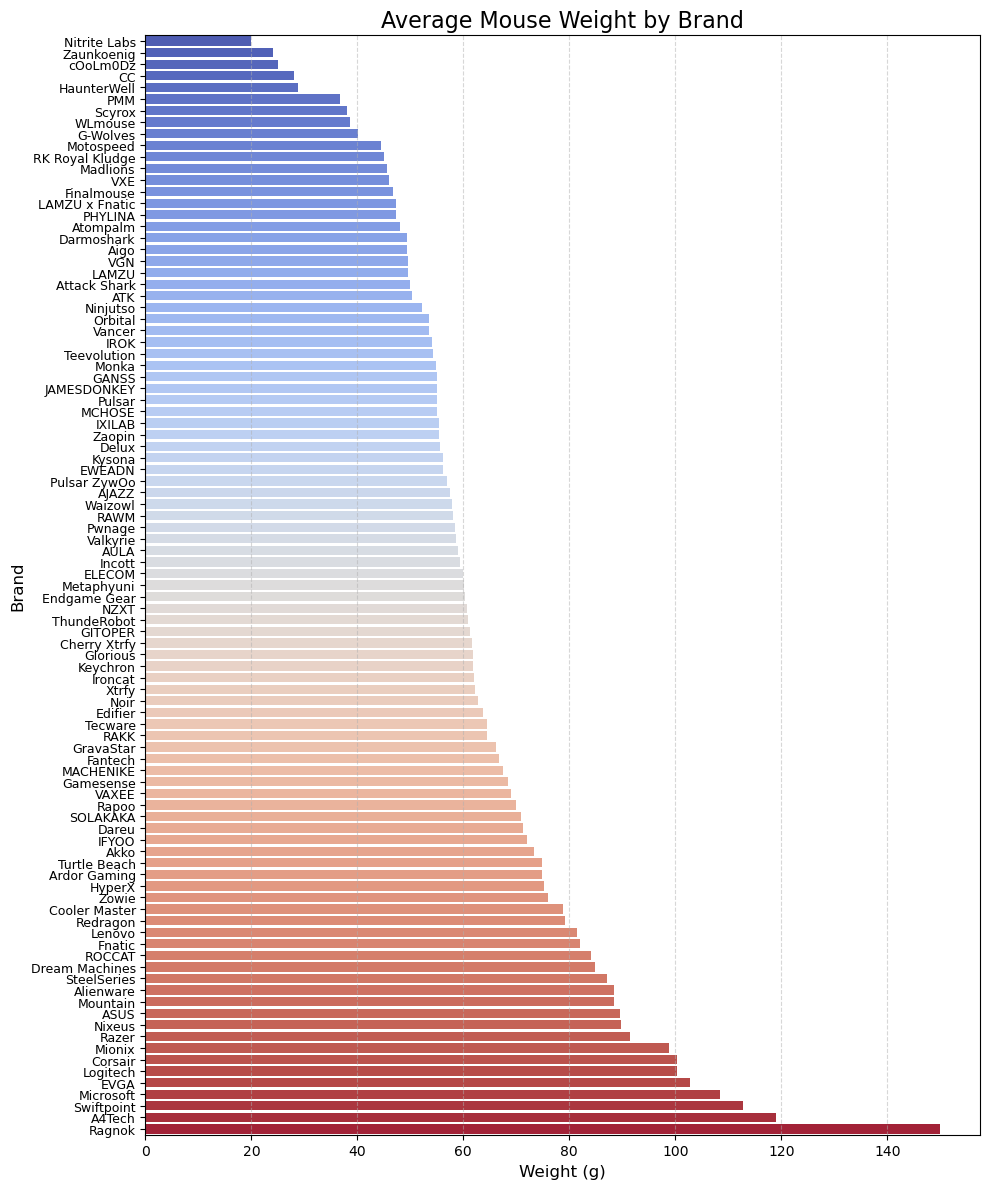

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and filter brands with more than 1 mouse (optional for clarity)
brand_avg_weight = df.groupby('brand')['weight_g'].mean()
brand_counts = df['brand'].value_counts()
filtered_brands = brand_avg_weight[brand_counts > 1].sort_values()

# Plot
plt.figure(figsize=(10, 12))
sns.barplot(x=filtered_brands.values, y=filtered_brands.index, palette='coolwarm')

plt.title('Average Mouse Weight by Brand', fontsize=16)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=9)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



### 🔗 Step 6: Checking Relationships Between Dimensions

I wanted to see how different mouse dimensions relate to each other, so I created a correlation heatmap.  
This shows how strongly features like length, width, height, and weight are connected.

Turns out, width and weight have the strongest correlation (0.63),  
which makes sense since wider mice probably use more materials.  
Other relationships like length vs weight are a bit weaker, but still worth noting.


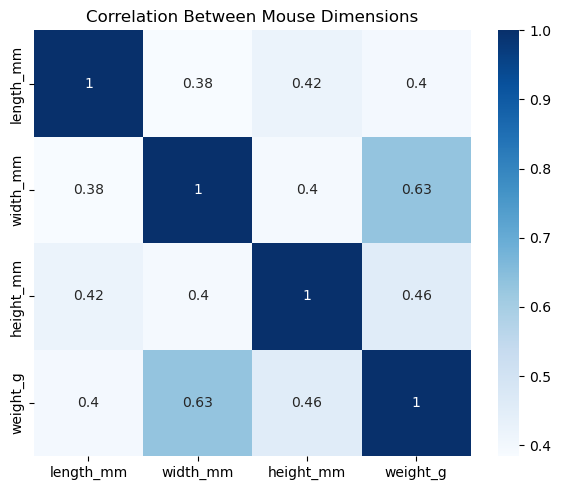

In [14]:
# Select numeric columns
numeric_cols = ['length_mm', 'width_mm', 'height_mm', 'weight_g']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Between Mouse Dimensions')
plt.tight_layout()
plt.show()


### 🖱️ Step 7: Mouse Shape Distribution

Next, I wanted to see what mouse shapes are most common across the dataset.  
This bar chart shows how many mice fall into each shape category: Symmetrical, Ergonomic, or Hybrid.

Symmetrical mice clearly dominate the dataset, which could suggest they’re more popular or easier to manufacture.  
Ergonomic designs are also well-represented, but hybrids are pretty rare.


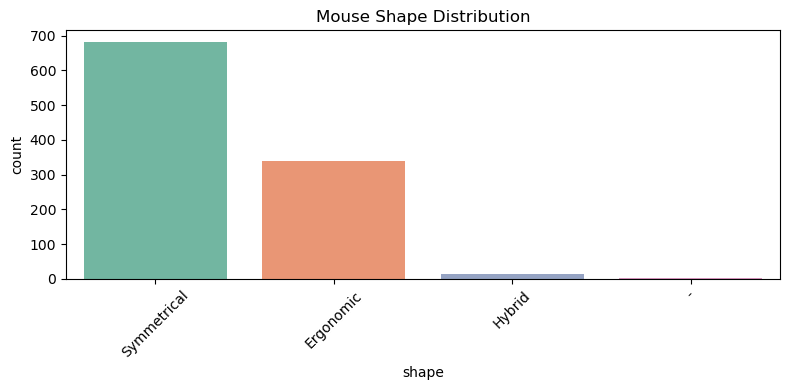

In [15]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='shape', order=df['shape'].value_counts().index, palette='Set2')
plt.title('Mouse Shape Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📏 Step 8: Summary Statistics

To wrap up the analysis, I used `.describe()` to view basic statistics for the numeric columns.  
This gives a quick overview of things like the average length, width, height, and weight across all mice.

Most mice are around 120mm long and weigh about 68g, but there are some big outliers too —  
with weights ranging from just 19g all the way up to 180g!


In [16]:
df.describe()[['length_mm', 'width_mm', 'height_mm', 'weight_g']]


,length_mm,width_mm,height_mm,weight_g
count,1038.000000,1038.000000,1038.000000,1035.000000
mean,120.337091,65.629672,39.521002,68.194686
std,8.884800,5.995906,5.214759,25.451310
min,72.300000,14.400000,19.000000,19.000000
25%,118.000000,62.225000,38.000000,52.000000
50%,121.100000,64.300000,39.000000,60.000000
75%,125.000000,67.000000,41.000000,80.500000
max,144.500000,100.000000,126.000000,180.000000


### ✅ Final Summary & Insights

This project explored a dataset of gaming mice, focusing on physical dimensions, weight, and design features.  
Through cleaning, analysis, and visualizations, I was able to uncover some clear trends in how gaming mice are built.

---

#### 📌 Key Takeaways:
- **Symmetrical mice** are the most common shape overall
- **Wider mice tend to weigh more**, with a correlation of 0.63 between width and weight
- Most mice fall around **120mm in length** and **68g in weight**, but there are outliers as light as 19g and as heavy as 180g
- Some brands consistently produce **ultra-light mice**, while others lean toward larger, heavier builds

---

#### 💡 Questions This Can Help Answer:
- What brands make the lightest mice for competitive gaming?
- How do physical dimensions relate to mouse weight?
- Is shape preference leaning more ergonomic or symmetrical in the current market?
- Which specs might influence comfort or performance for different hand sizes?

---

This type of analysis could be useful for:
- Product comparison tools
- Market research
- E-commerce filter optimization
- Personal recommendation systems for gamers

---

Thanks for reading! 👋
